## Part 2: Data Analysis & Modelling

### Data Preparation

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import statistics
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
#Load resale data

df = pd.read_csv('hdb_clean.csv')
df.sample(50)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
83693,1.379796,103.765990,175,LOMPANG ROAD,670175,175 LOMPANG RD,14.31,0.50,2021-11,BUKIT PANJANG,5 ROOM,175,LOMPANG RD,16 TO 18,121.0,Improved,1997,700000.0,75 years 01 month,74
3325,1.324679,103.939770,65,NEW UPPER CHANGI ROAD,460065,65 NEW UPP CHANGI RD,10.87,0.76,2022-05,BEDOK,4 ROOM,65,NEW UPP CHANGI RD,16 TO 18,92.0,New Generation,1978,480000.0,55 years 01 month,55
115098,1.319981,103.859005,108B,MCNAIR ROAD,323108,108B MCNAIR RD,4.18,0.31,2017-12,KALLANG/WHAMPOA,5 ROOM,108B,MCNAIR RD,22 TO 24,110.0,Improved,2004,778000.0,85 years 11 months,81
141886,1.421334,103.836318,606,YISHUN STREET 61,760606,606 YISHUN ST 61,15.39,0.57,2018-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,145.0,Apartment,1987,620000.0,68 years 02 months,64
105053,1.360096,103.746561,315,BUKIT BATOK STREET 32,650315,315 BT BATOK ST 32,14.44,0.60,2018-07,BUKIT BATOK,5 ROOM,315,BT BATOK ST 32,04 TO 06,122.0,Improved,1986,418000.0,67 years 03 months,63
92880,1.425962,103.829779,723,YISHUN STREET 71,760723,723 YISHUN ST 71,15.99,0.70,2021-05,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,738000.0,64 years 01 month,63
5457,1.350229,103.748341,621,BUKIT BATOK CENTRAL,650621,621 BT BATOK CTRL,13.66,0.19,2018-09,BUKIT BATOK,5 ROOM,621,BT BATOK CTRL,19 TO 21,110.0,Improved,2003,710000.0,84 years 02 months,80
89237,1.384760,103.893939,272B,SENGKANG CENTRAL,542272,272B SENGKANG CTRL,12.21,0.23,2018-05,SENGKANG,4 ROOM,272B,SENGKANG CTRL,10 TO 12,90.0,Premium Apartment,2009,550000.0,90 years 07 months,86
7856,1.284194,103.845986,532,UPPER CROSS STREET,050532,532 UPP CROSS ST,0.61,0.09,2018-07,CENTRAL AREA,3 ROOM,532,UPP CROSS ST,16 TO 18,60.0,Improved,1980,470000.0,61 years 01 month,57
15378,1.325412,103.857481,114,WHAMPOA ROAD,320114,114 WHAMPOA RD,4.74,0.80,2020-11,KALLANG/WHAMPOA,4 ROOM,114,WHAMPOA RD,01 TO 03,108.0,Model A,1995,465000.0,73 years 10 months,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184110 entries, 0 to 184109
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   latitude             184110 non-null  float64
 1   longitude            184110 non-null  float64
 2   blk_no               184110 non-null  object 
 3   road_name            184110 non-null  object 
 4   postal_code          184110 non-null  object 
 5   address              184110 non-null  object 
 6   cbd_dist             184110 non-null  float64
 7   min_dist_mrt         184110 non-null  float64
 8   month                184110 non-null  object 
 9   town                 184110 non-null  object 
 10  flat_type            184110 non-null  object 
 11  block                184110 non-null  object 
 12  street_name          184110 non-null  object 
 13  storey_range         184110 non-null  object 
 14  floor_area_sqm       184110 non-null  float64
 15  flat_model       

In [4]:
df['month'] = pd.to_datetime(df['month'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184110 entries, 0 to 184109
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   latitude             184110 non-null  float64       
 1   longitude            184110 non-null  float64       
 2   blk_no               184110 non-null  object        
 3   road_name            184110 non-null  object        
 4   postal_code          184110 non-null  object        
 5   address              184110 non-null  object        
 6   cbd_dist             184110 non-null  float64       
 7   min_dist_mrt         184110 non-null  float64       
 8   month                184110 non-null  datetime64[ns]
 9   town                 184110 non-null  object        
 10  flat_type            184110 non-null  object        
 11  block                184110 non-null  object        
 12  street_name          184110 non-null  object        
 13  storey_range  

In [6]:
# Load and merge CPI data

cpi = pd.read_csv('hdb_cpi.csv')
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b')

df = df.merge(cpi, on='month', how='left') 
df['real_price'] = (df['resale_price'] / df['cpi']) * 100 

In [7]:
df.sample(10)

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,cpi,real_price
88715,1.446151,103.815652,337,SEMBAWANG CRESCENT,750337,337 SEMBAWANG CRES,18.47,0.58,2016-07-01,SEMBAWANG,...,SEMBAWANG CRES,16 TO 18,135.0,Apartment,1999,520000.0,82,76,103.848,500731.838841
136199,1.345679,103.706599,265,BOON LAY DRIVE,640265,265 BOON LAY DR,17.53,0.78,2023-01-01,JURONG WEST,...,BOON LAY DR,04 TO 06,112.0,Model A,1995,490000.0,71 years 05 months,72,NaN,NaN
165913,1.378010,103.901071,471B,UPPER SERANGOON CRESCENT,532471,471B UPP SERANGOON CRES,11.88,1.03,2021-12-01,HOUGANG,...,UPP SERANGOON CRES,10 TO 12,92.0,Model A,2015,515000.0,92 years 06 months,92,NaN,NaN
49569,1.271409,103.810888,44,TELOK BLANGAH DRIVE,100044,44 TELOK BLANGAH DR,4.68,0.15,2022-03-01,BUKIT MERAH,...,TELOK BLANGAH DR,04 TO 06,65.0,Improved,1976,365000.0,52 years 10 months,53,NaN,NaN
114357,1.365758,103.889720,702,HOUGANG AVENUE 2,530702,702 HOUGANG AVE 2,10.10,0.68,2022-01-01,HOUGANG,...,HOUGANG AVE 2,07 TO 09,82.0,New Generation,1985,370000.0,62 years 09 months,62,NaN,NaN
176789,1.376078,103.746903,815A,CHOA CHU KANG AVENUE 7,681815,815A CHOA CHU KANG AVE 7,15.52,1.06,2023-01-01,CHOA CHU KANG,...,CHOA CHU KANG AVE 7,16 TO 18,93.0,Model A,2017,592888.0,93 years 03 months,94,NaN,NaN
114145,1.329159,103.886010,35,CIRCUIT ROAD,370035,35 CIRCUIT RD,6.40,0.40,2022-01-01,GEYLANG,...,CIRCUIT RD,13 TO 15,72.0,Standard,1971,300000.0,48 years,48,NaN,NaN
13339,1.345426,103.703465,675A,JURONG WEST STREET 64,641675,675A JURONG WEST ST 64,17.84,0.81,2019-01-01,JURONG WEST,...,JURONG WEST ST 64,07 TO 09,110.0,Premium Apartment,2008,438000.0,88 years 05 months,85,99.631,439622.205940
95479,1.380655,103.773699,250,BANGKIT ROAD,670250,250 BANGKIT RD,13.83,1.37,2019-08-01,BUKIT PANJANG,...,BANGKIT RD,10 TO 12,73.0,Model A,1988,278000.0,68 years 03 months,65,100.598,276347.442295
35195,1.343020,103.738116,252,JURONG EAST STREET 24,600252,252 JURONG EAST ST 24,14.24,0.60,2016-07-01,JURONG EAST,...,JURONG EAST ST 24,01 TO 03,70.0,New Generation,1985,300000.0,67,62,103.848,288883.753178


In [8]:
#Check for null values

df.isnull().sum()

latitude                   0
longitude                  0
blk_no                     0
road_name                  0
postal_code                0
address                    0
cbd_dist                   0
min_dist_mrt               0
month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
lease_remain_years         0
cpi                    66610
real_price             66610
dtype: int64

In [9]:
df['real_price'] = df['real_price'].fillna(df.pop('resale_price'))
df = df.drop('cpi', axis=1)

In [10]:
# Create function for median value for storey_range

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

In [11]:
df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df.sample(10)

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,lease_remain_years,real_price,storey_median
132115,1.421335,103.837437,643,YISHUN STREET 61,760643,643 YISHUN ST 61,15.37,0.66,2017-11-01,YISHUN,...,643,YISHUN ST 61,01 TO 03,142.0,Apartment,1987,68 years 11 months,64,506197.230167,2.0
63810,1.425687,103.834008,762,YISHUN STREET 72,760762,762 YISHUN ST 72,15.89,0.43,2020-12-01,YISHUN,...,762,YISHUN ST 72,07 TO 09,84.0,Simplified,1985,63 years 10 months,62,337000.000000,8.0
34236,1.325720,103.901822,336,UBI AVENUE 1,400336,336 UBI AVE 1,7.34,0.55,2018-08-01,GEYLANG,...,336,UBI AVE 1,07 TO 09,83.0,Simplified,1986,66 years 06 months,63,379367.133278,8.0
70833,1.379564,103.880454,980A,BUANGKOK CRESCENT,531980,980A BUANGKOK CRES,11.16,1.46,2015-04-01,HOUGANG,...,980A,BUANGKOK CRES,13 TO 15,85.0,Model A2,2003,87,80,378905.229212,14.0
160671,1.348794,103.708418,181B,BOON LAY DRIVE,642181,181B BOON LAY DR,17.49,1.16,2019-08-01,JURONG WEST,...,181B,BOON LAY DR,16 TO 18,47.0,Model A,2014,93 years 09 months,91,228632.776000,17.0
79073,1.433716,103.793326,521,WOODLANDS DRIVE 14,730521,521 WOODLANDS DR 14,17.87,0.65,2022-04-01,WOODLANDS,...,521,WOODLANDS DR 14,07 TO 09,148.0,Premium Apartment,2000,77 years 03 months,77,715000.000000,8.0
122243,1.344633,103.955924,146,SIMEI STREET 2,NIL,146 SIMEI ST 2,13.49,0.32,2021-12-01,TAMPINES,...,146,SIMEI ST 2,04 TO 06,122.0,Improved,1988,65 years 10 months,65,618000.000000,5.0
49192,1.346775,103.753336,215,BUKIT BATOK STREET 21,650215,215 BT BATOK ST 21,12.98,0.49,2015-07-01,BUKIT BATOK,...,215,BT BATOK ST 21,01 TO 03,67.0,New Generation,1984,68,61,239660.051435,2.0
93128,1.373165,103.857412,549,ANG MO KIO AVENUE 10,560549,549 ANG MO KIO AVE 10,9.99,0.94,2022-07-01,ANG MO KIO,...,549,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1981,57 years 07 months,58,340000.000000,8.0
44111,1.445407,103.773370,206,MARSILING DRIVE,730206,206 MARSILING DR,19.94,1.34,2022-08-01,WOODLANDS,...,206,MARSILING DR,07 TO 09,68.0,New Generation,1981,57 years 09 months,58,318888.000000,8.0


In [12]:
# Create df for required variables
df_resale = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','real_price']]
df_resale.sample(5)

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,real_price
85419,11.13,0.40,121.0,63,8.0,595000.000000
75542,12.04,2.02,95.0,81,2.0,460000.000000
14252,16.92,1.10,150.0,63,5.0,522060.522061
44932,18.05,0.69,100.0,74,2.0,319701.982152
150610,11.36,0.81,105.0,62,2.0,530000.000000


In [13]:
# Remove duplicates
df_resale = df_resale.drop_duplicates()
df_resale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182962 entries, 0 to 184109
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cbd_dist            182962 non-null  float64
 1   min_dist_mrt        182962 non-null  float64
 2   floor_area_sqm      182962 non-null  float64
 3   lease_remain_years  182962 non-null  int64  
 4   storey_median       182962 non-null  float64
 5   real_price          182962 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 9.8 MB


In [14]:
df_resale.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
real_price            float64
dtype: object

### Data Visualisation

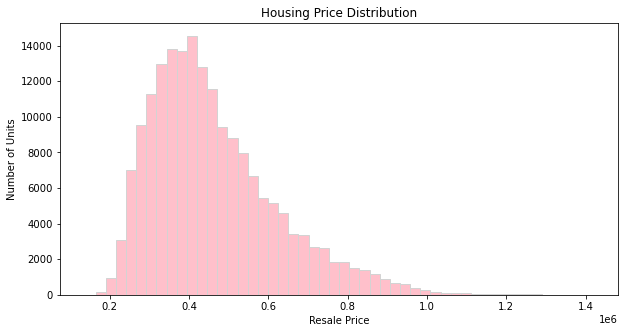

In [15]:
# Overall Sales

plt.figure(figsize = (10,5))
plt.hist(df_resale['real_price'], bins =50, color ='pink', ec = 'lightgrey')
plt.title('Housing Price Distribution')
plt.xlabel('Resale Price')
plt.ylabel('Number of Units')
plt.show()

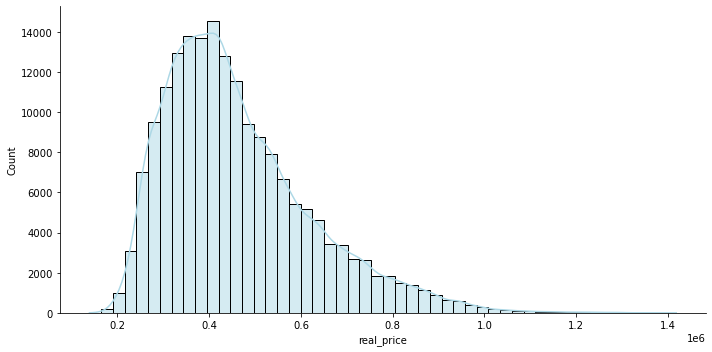

In [16]:
# Sales distribution

sns.displot(df_resale['real_price'], bins = 50, kind = 'hist', kde = True, aspect = 2, color = 'lightblue')
plt.show()

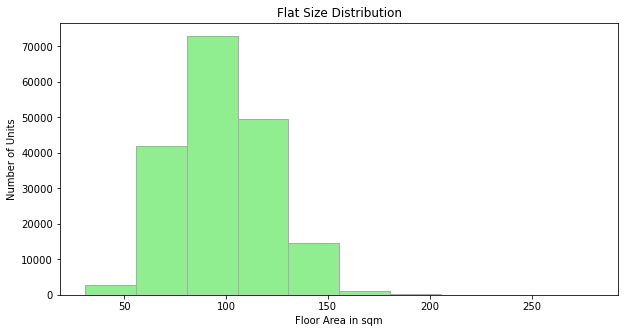

In [17]:
# Flat Size Distribution

plt.figure(figsize = (10,5))
plt.hist(df_resale['floor_area_sqm'], color ='lightgreen', ec = 'darkgrey')
plt.title('Flat Size Distribution')
plt.xlabel('Floor Area in sqm')
plt.ylabel('Number of Units')
plt.show()

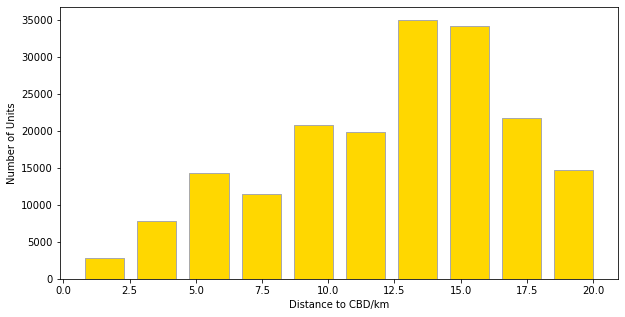

In [18]:
# Distance to CBD

plt.figure(figsize = (10,5))
plt.hist(df_resale['cbd_dist'], bins = 10, color ='gold', ec = 'darkgrey', rwidth = 0.75)
plt.xlabel('Distance to CBD/km')
plt.ylabel('Number of Units')
plt.show()

### Correlations

In [19]:
df_resale.corr()

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,real_price
cbd_dist,1.000000,0.163084,0.256053,0.304859,-0.165350,-0.253586
min_dist_mrt,0.163084,1.000000,0.024867,0.258507,0.032312,-0.097243
floor_area_sqm,0.256053,0.024867,1.000000,0.176959,-0.000551,0.607841
lease_remain_years,0.304859,0.258507,0.176959,1.000000,0.278687,0.375042
storey_median,-0.165350,0.032312,-0.000551,0.278687,1.000000,0.367004
real_price,-0.253586,-0.097243,0.607841,0.375042,0.367004,1.000000


In [20]:
#Filtering the array 

mask = np.zeros_like(df_resale.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

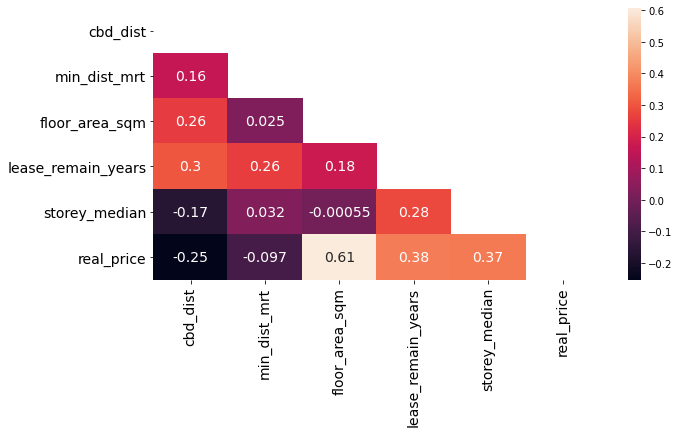

In [21]:
# Plot heatmap; use mask argument to filter out duplicates

plt.figure(figsize = (10,5))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.heatmap(df_resale.corr(), mask = mask, annot = True, annot_kws = {'size': 14}) 
plt.show()

### Model A: Linear Regression

In [22]:
prices = df_resale['real_price']
features = df_resale.drop('real_price', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

print('Intercept:', lr.intercept_)
print('Training Data CV score:', np.mean(cross_val_score(lr, x_train, y_train, cv=5)))
print('Test Data CV score:', np.mean(cross_val_score(lr, x_test, y_test, cv=5))) 

Intercept: -92426.29512044974
Training Data CV score: 0.7572780010409952
Test Data CV score: 0.7605403330008705


### Model B: KNN Regressor

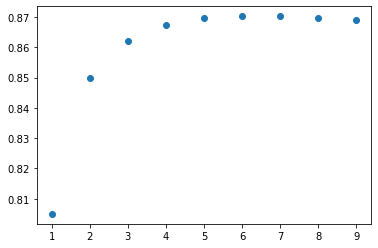

In [23]:
#Obtain optimal k value

cv_score=[]
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors= i)
    cv_score.append(np.mean(cross_val_score(knn,x_train,y_train,cv=5)))
    x = range(1,10)
plt.scatter(x,cv_score)
plt.show()

In [24]:
knn = KNeighborsRegressor(n_neighbors= 6)
knn.fit(x_train, y_train)
print('Training Data CV score:', np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
print('Test Data CV score:', np.mean(cross_val_score(knn, x_test, y_test, cv=5))) 

Training Data CV score: 0.8702351553009325
Test Data CV score: 0.8403001375540551


### Model C: Decision Tree Regressor

In [25]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
print('Training Data CV score:', np.mean(cross_val_score(dtr, x_train, y_train, cv=5)))
print('Test Data CV score:', np.mean(cross_val_score(dtr, x_test, y_test, cv=5))) 

Training Data CV score: 0.8335619634116131
Test Data CV score: 0.7993494588730753


### Model D: Random Forest Regressor

In [26]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(x_train, y_train)
print('Training Data CV score:', np.mean(cross_val_score(rf, x_train, y_train, cv=5)))
print('Test Data CV score:', np.mean(cross_val_score(rf, x_test, y_test, cv=5))) 

Training Data CV score: 0.8740857683515305
Test Data CV score: 0.8682681087840358


Feature: 0, Score: 0.29308
Feature: 1, Score: 0.04619
Feature: 2, Score: 0.48895
Feature: 3, Score: 0.13849
Feature: 4, Score: 0.03329


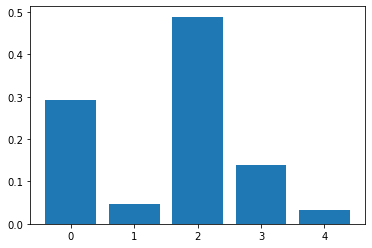

In [27]:
# Obtain Feature Importance

importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Valuation of Resale Unit

In [28]:
# Verify Features

features.sample(10)

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median
120949,14.60,0.38,110.0,72,5.0
96317,9.39,1.33,103.0,60,8.0
114779,15.63,0.86,125.0,72,5.0
107637,18.65,0.94,104.0,67,5.0
34770,11.12,1.24,100.0,74,14.0
116711,13.25,0.81,102.0,61,8.0
125121,10.09,1.10,104.0,61,8.0
134533,12.88,0.80,133.0,61,11.0
147511,18.82,0.15,110.0,79,5.0
60418,14.70,0.69,119.0,74,5.0


In [30]:
# Create and fit model

model = RandomForestRegressor(n_estimators = 10).fit(features, prices)
pred = model.predict(features)
model_mse = mean_squared_error(prices, pred)
model_rmse = np.sqrt(model_mse)

In [31]:
# Function for valuation 

def resale_estimate (cbd_dist, min_dist_mrt, floor_area_sqm, lease_remain_years, storey_median, high_confidence = True):
    
    features_new = [[cbd_dist, min_dist_mrt, floor_area_sqm, lease_remain_years, storey_median]]
    prediction = model.predict(features_new)
    
      # Calculate prediction interval
    if high_confidence:
        upper_bound = prediction + 2*model_rmse
        lower_bound = prediction - 2*model_rmse
        interval = 95
    else:
        upper_bound = prediction + model_rmse
        lower_bound = prediction - model_rmse
        interval = 68
    
    return round(prediction[0], 2), round(upper_bound[0], 2), round(lower_bound[0], 2), interval

In [32]:
resale_estimate(23, 0.5, 91, 61, 11, high_confidence =True)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(348780.5, 422108.53, 275452.48, 95)